Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation 67
Generation 68
Generation 69
Generation 70
Generation 71
Ge

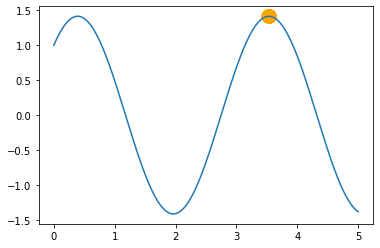

In [20]:
#Evolution Algorithm
import numpy as np
import matplotlib.pyplot as plt



class EA:
  def parameters(self,chrom_size,chrom_bound,n_generations,population_size,n_offspring,mutation):
    self.chrom_size=chrom_size
    self.chrom_bound=chrom_bound
    self.generations=n_generations
    self.population=population_size
    self.n_offspring=n_offspring
    self.mutation=mutation
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  def function(self,x):
    return 2*x*x - np.cos(2*x)
  def harmonic(self,x):
    return np.cos(2*x) + np.sin(2*x)
  def fitness(self,z):
    return z.flatten() + 1e-3

  def offspring(self,population,n_offspring):
    
    children=dict({"chromosome":np.zeros((n_offspring,self.chrom_size))})
    if self.mutation==True:
      children['mutate']=np.zeros_like(children['chromosome'])

      for i,j in zip(children['chromosome'],children['mutate']):
        sample1,sample2=np.random.choice(np.arange(self.population),size=2)
        crossover=np.random.randint(0,2,self.chrom_size,dtype=np.bool)
        i[crossover]=population['chromosome'][sample1,crossover]
        i[~crossover]=population['chromosome'][sample2,~crossover]
        j[crossover]=population['mutate'][sample1,crossover]
        j[~crossover]=population['mutate'][sample2,~crossover]
        j[:]=np.maximum((j + np.random.rand(*j.shape)-0.2),0)
        i+=j*np.random.rand(*i.shape)
        i[:]=np.clip(i,*self.chrom_bound)
      return children
    else:
      for i in zip(children['chromosome']):
        sample1,sample2=np.random.choice(np.arange(self.population),size=2)
        crossover=np.random.randint(0,2,self.chrom_size,dtype=np.bool)
        i[crossover]=population['chromosome'][sample1,crossover]
        i[~crossover]=population['chromosome'][sample2,~crossover]
        i[:]=np.clip(i,*self.chrom_size)
      return children

  def survival_of_fittest(self,pop, kids):
    if self.mutation==False:
      pass
    for key in ['chromosome', 'mutate']:
        pop[key] = np.vstack((pop[key], kids[key]))

    fit = self.fitness(self.harmonic(pop['chromosome']))            # calculate global fitness
    idx = np.arange(pop['chromosome'].shape[0])
    good_idx = idx[fit.argsort()][-self.population:]   # selected by fitness ranking (not value)
    for key in ['chromosome', 'mutate']:
        pop[key] = pop[key][good_idx]
    #print(pop)
    return pop
  def plot(self):
    x = np.linspace(*self.chrom_bound, 200)
    plt.plot(x, self.harmonic(x))

  
    
if __name__=='__main__':
  ea=EA()
  ea.parameters(1,[0,5],200,100,50,True)
  population=dict(chromosome=5*np.random.rand(1,ea.chrom_size).repeat(ea.population,axis=0),mutate=np.random.rand(ea.population,ea.chrom_size))
  ea.plot()
  for m in range(ea.generations):
    
    child = ea.offspring(population, ea.n_offspring)
    #print(child)
    population = ea.survival_of_fittest(population, child)   
    print("Generation",m)
    #print("Population",population)
  scatter_pl = plt.scatter(population['chromosome'], ea.harmonic(population['chromosome']), s=200, lw=0, c='orange', alpha=0.5); plt.pause(0.05)

  plt.show()  
